<a href="https://colab.research.google.com/github/ArpitaDeshmukh2024/SPPU_DL_practicals/blob/main/DL3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(xtrain, ytrain), (xtest, ytest) = fashion_mnist
xtrain = xtrain.reshape(-1,28,28,1).astype('float32')/255.0
xtest = xtest.reshape(-1,28,28,1).astype('float32')/255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation = "relu", input_shape = (28, 28, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [8]:
history = model.fit(xtrain, ytrain, epochs = 10, validation_split = 0.2, verbose = 0)

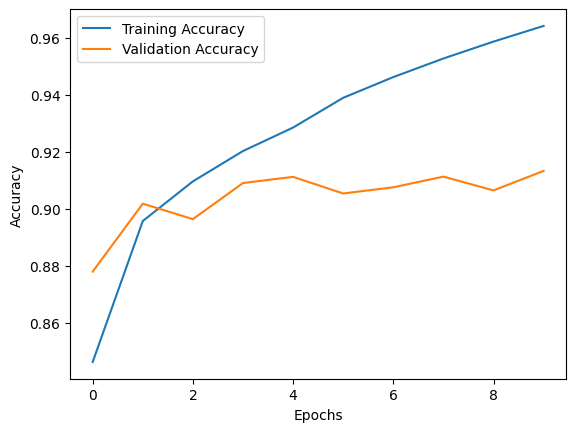

In [9]:
plt.plot(history.history['accuracy'], label = "Training Accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [10]:
test_loss, test_acc = model.evaluate(xtest, ytest, verbose = 0)
print("Test Loss : ", test_loss)
print("Test Accuracy : ", test_acc)

Test Loss :  0.31020990014076233
Test Accuracy :  0.9103000164031982
